# 1. Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan *objective* yang ingin dicapai.

      > Nama : Reyki seprianza

      > Batch :009
## Dataset Description
[download_dataset](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data). 

### Tentang Data

Dataset from Davide Chicco, Giuseppe Jurman: â€œMachine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

Attribute Information:

1. age = Age

2. anaemia = Decrease of red blood cells or hemoglobin (boolean)

3. creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)

4. diabetes = If the patient has diabetes (boolean)

5. ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)

6. high_blood_pressure =I f the patient has hypertension (boolean)

7. platelets = Platelets in the blood (kiloplatelets/mL)

8. serum_creatinine = Level of serum creatinine in the blood (mg/dL)

9. serum_sodium = Level of serum sodium in the blood (mEq/L)

10. sex = Woman or man (binary)

11. smoking = If the patient smokes or not (boolean)

12. time = Follow-up period (days)

#### Target 

13. DEATH_EVENT = If the patient deceased during the follow-up period (boolean)

# 2. Judul/Penanda Soal
   > Sediakan cell markdown sebelum cell import pustaka yang berisi nomor soal dan judul problem yang dikerjakan disetiap soalnya. Setiap soal mengikuti format nomor 3-11.
   ## Assignment Objectives 
   
*Graded Challenge 3* ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

- Mampu memahami konsep Classification dengan Ensemble Model.
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model.
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi.

# 3. Import Pustaka
   > Cell pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer,OutlierTrimmer


#models
#ensembles
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#evaluation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error




# 4. Data Loading
   > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.
   

In [2]:
#definisi randomstate agar tidak berubah kemudian dan set display menampilkan seluruh kolom
np.random.seed(13)
random_state = 14
pd.set_option('display.max_columns', None)

In [3]:
df0 = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df0.copy()
df.shape

(299, 13)

In [4]:
df.head(5).T

,0,1,2,3,4
age,75.0,55.00,65.0,50.0,65.0
anaemia,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,582.0,7861.00,146.0,111.0,160.0
diabetes,0.0,0.00,0.0,0.0,1.0
ejection_fraction,20.0,38.00,20.0,20.0,20.0
high_blood_pressure,1.0,0.00,0.0,0.0,0.0
platelets,265000.0,263358.03,162000.0,210000.0,327000.0
serum_creatinine,1.9,1.10,1.3,1.9,2.7
serum_sodium,130.0,136.00,129.0,137.0,116.0
sex,1.0,1.00,1.0,1.0,0.0


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

tidak ada missing value di dataset

# 5. Exploratory Data Analysis (EDA)
   > Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.


> Maka di putuskan untuk melihat keterikatan antara value yang sering keluar dengan target kita yaitu y.

In [8]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [9]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Text(0.5, 1.0, 'Jumlah Data death')

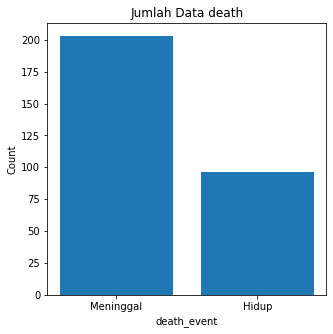

In [10]:
death = df['DEATH_EVENT'].value_counts().to_dict()

plt.figure(figsize=(5,5))
plt.bar(['Meninggal','Hidup'], death.values())
plt.xlabel('death_event')
plt.ylabel('Count')
plt.title('Jumlah Data death')

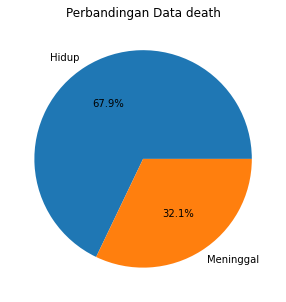

In [11]:
plt.figure(figsize=(5,5),facecolor='white')
fig = plt.pie(death.values(), labels=['Hidup','Meninggal'], autopct='%1.1f%%')
plt.title('Perbandingan Data death')
plt.show()

> sample data yang kita miliki sangat jauh perbedaanya data yang Bertahan hidup sebesar 67.9% dan meninggal 32.1%.

In [58]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution  AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark"
                  )
fig.show()

> Pesebaran data kematian berbanding dengan usia, bisa di lihat yang paling banyak adalah usia 60

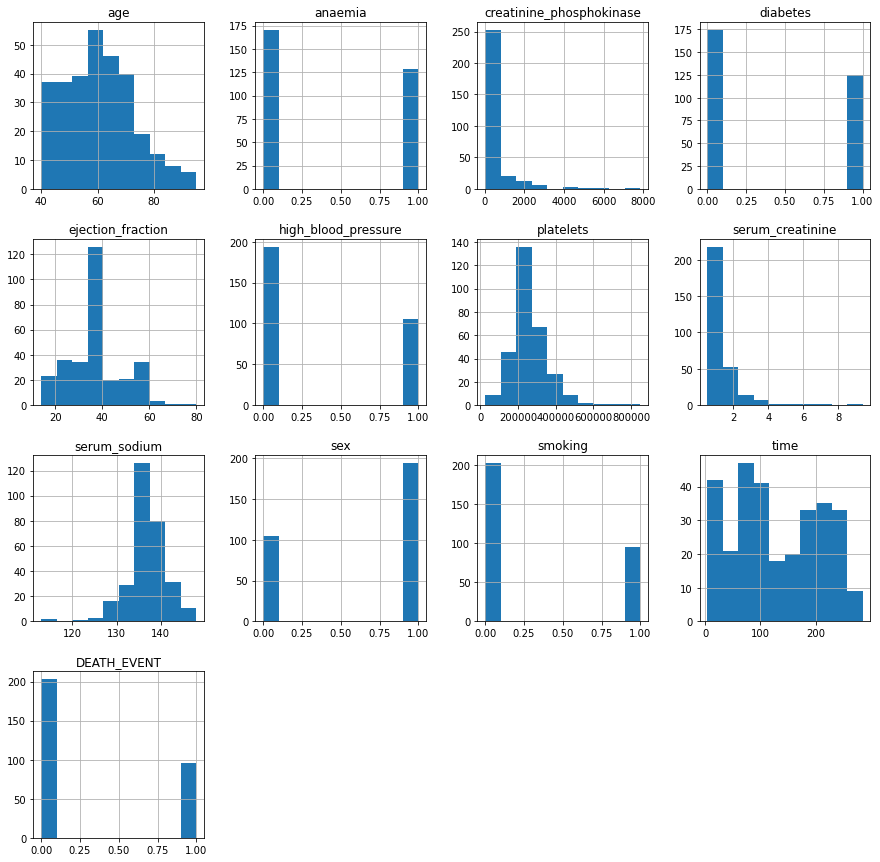

In [13]:
# Histogram plot

df.hist()
plt.gcf().set_size_inches(15, 15)
plt.show()

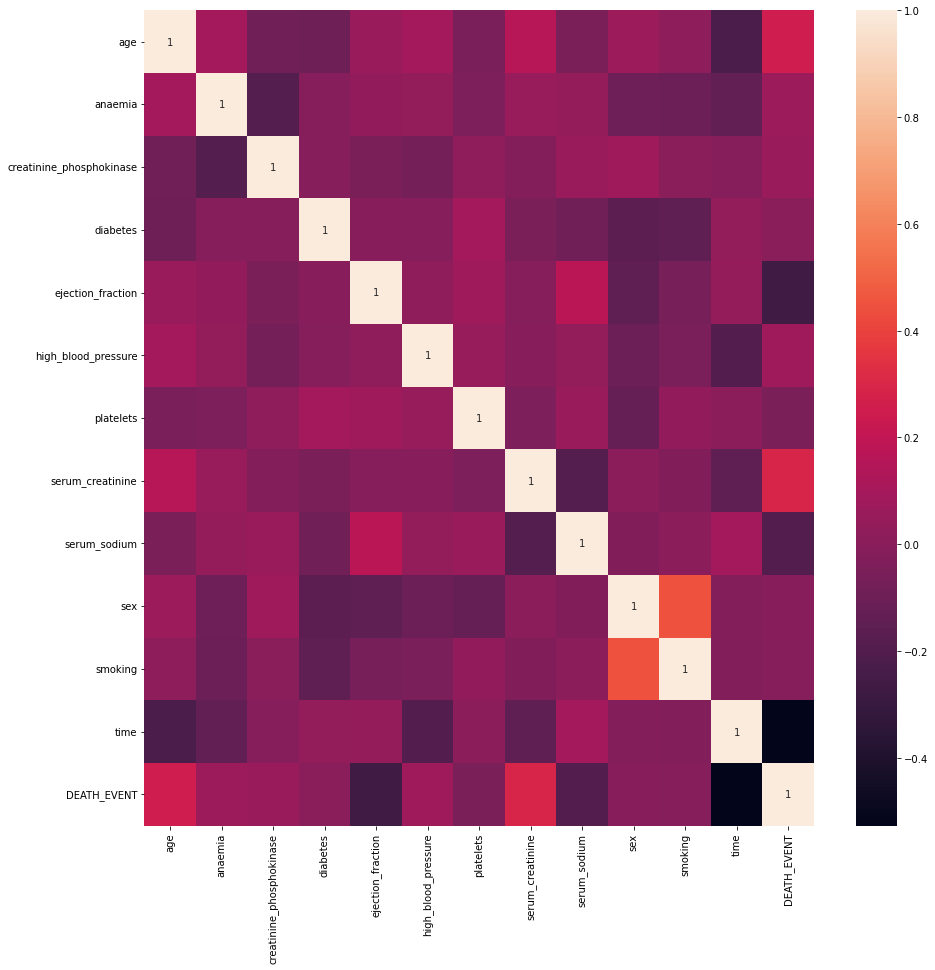

In [14]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

> Data sudah berkorelasi dengan baik jadi bisa di lanjutkan ke proses berikutnya

# 6. Data Preprocessing
   > Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.


In [15]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


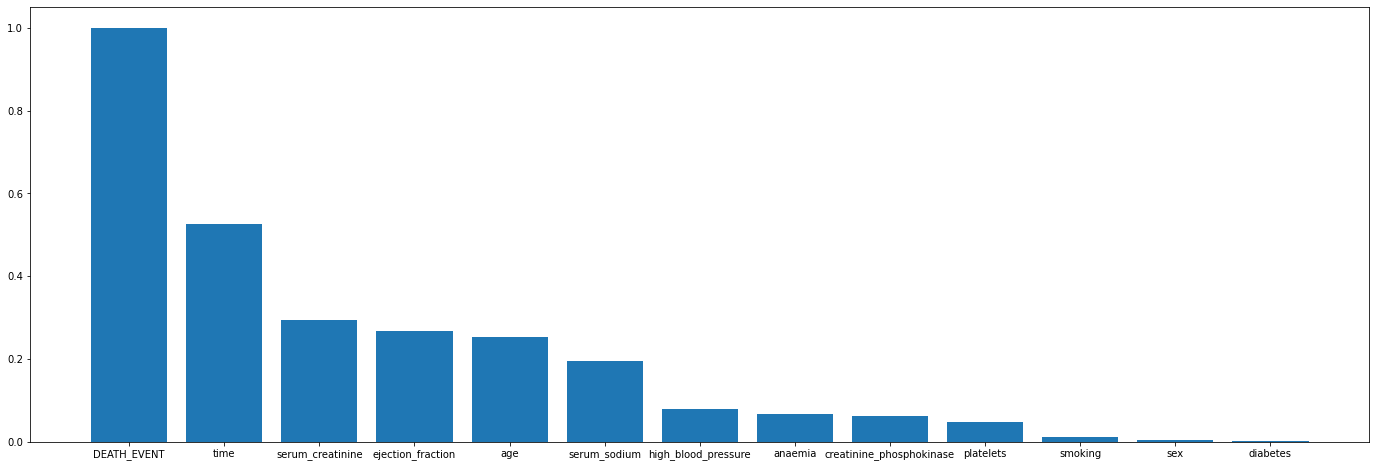

In [17]:
_corr = df.corrwith(df['DEATH_EVENT']).abs().sort_values(ascending=False)
plt.figure(figsize=(8 * 3, 8))
plt.bar(_corr.index, _corr.values);

In [18]:
df.corr()['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

> Corelation yang ter besar terhadap target kita adalah 

    - time
    - serum_creatinine
    - ejection_fraction
    - age
    - serum_sodium

In [19]:
df_ff = df[['DEATH_EVENT','time','serum_creatinine','age','serum_sodium']]
df_ff.head()

,DEATH_EVENT,time,serum_creatinine,age,serum_sodium
0,1,4,1.9,75.0,130
1,1,6,1.1,55.0,136
2,1,7,1.3,65.0,129
3,1,7,1.9,50.0,137
4,1,8,2.7,65.0,116


In [20]:
for var in df_ff.columns:

    print(var, ' berisi ', len(df[var].unique()), ' labels')


DEATH_EVENT  berisi  2  labels
time  berisi  148  labels
serum_creatinine  berisi  40  labels
age  berisi  47  labels
serum_sodium  berisi  27  labels


## 6.2 Data Splitting
 > bagian ini berisi proses pembagian data menjadi train-test-inference.

## Memecah dataset

In [114]:
#mengambil data inference 
df_inf = df_ff.sample(5, random_state=random_state) #diambil sebanyak 5 sample
df_train_test = df_ff.drop(df_inf.index)
#reset index dari data yang di ambil
df_train_test = df_train_test.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)
#menghapus target dari data 
X = df_train_test.drop('DEATH_EVENT', axis=1)
y = df_train_test[['DEATH_EVENT']]
#memecah data menjadi train dan test, dan data validation untuk keperluas corss validation nantinya
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state, stratify=y_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((235, 4), (235, 1), (59, 4), (59, 1))

## 6.3 Handling Outlier
 > bagian ini berisi proses penanganan outliers.

In [115]:
# memisahkan data numerik dan categorical harus di update karena target sudah di keluarkan

num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: ['time', 'serum_creatinine', 'age', 'serum_sodium']
Categorical Columns: []


In [116]:
#pisahkan data menjadi feature categori dan numerik
X_train_cat = X_train[cat_cols]
X_train_num = X_train.drop(columns=cat_cols)

X_test_cat = X_test[cat_cols]
X_test_num = X_test.drop(columns=cat_cols)

In [117]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed extreme
def find_extreme_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 3 * IQR
    lower_boundary = Q1 - 3 * IQR
    return upper_boundary, lower_boundary

In [118]:
#variable untuk summary
distribution = []
skewness = []
upper_limit = []
lower_limit = []
outliers_percent = []
max = []
min = []

#loop untuk summary outlier
for column in X_train_num.columns:
    col_skewness = X_train_num[column].skew()

    if (col_skewness >= -0.5) & (col_skewness <= 0.5):
        col_distribution = 'Normal'
        col_upper_limit, col_lower_limit = find_normal_boundaries(X_train_num,column)      

    else:
        col_distribution = 'Skewed'
        col_upper_limit, col_lower_limit = find_skewed_boundaries(X_train_num,column)
    
    col_max = X_train_num[column].max()
    col_min = X_train_num[column].min()
    col_outliers_percent = (len(X_train_num[X_train_num[column] > col_upper_limit]) + len(X_train_num[X_train_num[column] < col_lower_limit])) / len(X_train_num) * 100
    
    distribution.append(col_distribution)
    skewness.append(col_skewness)
    upper_limit.append(col_upper_limit)
    max.append(col_max)
    min.append(col_min)
    lower_limit.append(col_lower_limit)
    outliers_percent.append(col_outliers_percent)

#df summary
outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'upper_limit':upper_limit, 'lower_limit':lower_limit, 'max':max, 'min':min , 'outliers_percent':outliers_percent}
outliers_summary = pd.DataFrame(outliers_summary,index=X_train_num.columns)
outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
outliers_summary

,distribution_type,skewnewss,upper_limit,lower_limit,max,min,outliers_percent
serum_creatinine,Skewed,4.48,2.15,0.15,9.4,0.5,10.21
serum_sodium,Skewed,-1.16,149.00,125.00,148.0,113.0,1.70


> Setelah di lakukan penelusuran terhadap kolom outlier, saya menganggap hal ini sebagai hal yang wajar dalam medis dan bisa menyebabkan kematian

- creatinine_phosphokinase
        - Peningkatan dari total kreatin kinase tidak spesifik pada jantung dan dapat ditemukan pada pasien dengan cedera otot skeletal. Secara klinis, tes kreatin kinase dilakukan untuk mencari indikasi serangan jantung, rabdomiolisis, distrofi muskular dan gagal ginjal.

- serum_creatinine
        - Kreatin, asam amino bentuk awal dari kreatinin, diproduksi di hati kemudian diangkut melalui darah ke otot untuk membantunya berkontraksi. Kreatin yang sudah digunakan tersebut akan rusak dan memasuki aliran darah menuju ginjal.

- platelet
         - merupakan kepingan darah yang diproduksi oleh sumsum tulang. Trombosit berperan dalam proses pembekuan darah. Ketika terjadi perdarahan, kepingan darah ini bekerja dengan cara saling menempel untuk membentuk gumpalan, sehingga perdarahan tersebut berhenti.


- serum_sodium
        - Hipernatremia adalah kondisi tingginya natrium atau sodium di dalam darah. Kondisi ini terjadi jika tubuh terlalu banyak melepaskan air - atau pasien terlalu banyak mengonsumsi natrium pada kasus yang jarang terjadi. Hipernatremia dapat disebabkan oleh beberapa faktor, termasuk usia lanjut, dehidrasi, hingga diare yang parah

> data yang kita miliki outlier yang ada pada jumlah yang tinggi pada masing - masing kolom, dan ini juga merupakan faktor kematian jadi saya memutuskan untuk tidak melakukan perubahan pada data outlier

## 6.4 Handling Missing Values

### *Data tidak memiliki missing values*

> dataset kita bersih dari missing value

## 6.5 Feature Selection
> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

## 6.6 Feature Scalling
Lakukan feature scaling dengan standard scaler untuk feature numerik karena model yang digunakan sensitif terhadap variance.


> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

## 6.7 Feature Encoding
Lakukan feature encoding dengan onehot encoder karena dari feature kategorik tidak ada tingkatan yang bermakna atau tidak bisa dibandingkan.


> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

## 6.8 Final Features


> langkah ini saya jadikan sebagai comment karena sudah saya ringkas di bawah sebagai `pipeline`

## 6.9 Preprosesing menggunakan Pipeline

In [119]:
X_train.columns

Index(['time', 'serum_creatinine', 'age', 'serum_sodium'], dtype='object')

In [120]:
X_train

,time,serum_creatinine,age,serum_sodium
178,150,1.00,59.0,136
125,104,0.70,61.0,136
71,72,1.30,65.0,137
119,95,0.75,60.0,140
271,245,0.80,45.0,137
...,...,...,...,...
138,109,0.90,46.0,140
228,209,0.90,40.0,137
259,237,1.00,68.0,140
146,115,0.90,60.0,136


In [121]:
# melakukan encoding terhadap features sesuai dengan tipe nya
preprocessing_pipeline = ColumnTransformer([
    ('std', StandardScaler(), ['time', 'serum_creatinine', 'age', 'serum_sodium']),
    ])

In [122]:
preprocessing_pipeline.fit(X_train)

ColumnTransformer(transformers=[('std', StandardScaler(),
                                 ['time', 'serum_creatinine', 'age',
                                  'serum_sodium'])])

> Features sudah selesai di encoding sesuai dengan categorinya

# 7. Model Definition
   > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

- Random Forest	Mengimplementasikan Random Forest dan menentukan hyperparameter yang tepat dengan Scikit-Learn	40 pts
- Boosting	Mengimplementasikan Boosting dan menentukan hyperparameter yang tepat dengan Scikit-Learn	40 pts

In [150]:

#pipeling random forest
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf=2, min_samples_split=2, max_features='sqrt', max_depth=10, bootstrap=True))
])

#pipeline MLP Classifier
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', XGBClassifier(booster='gbtree', nthread=4, eta=0.1))
])

# 8. Model Training
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.


In [124]:
#Training model
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

[21:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "num_pbuffer", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['time', 'serum_creatinine',
                                                   'age', 'serum_sodium'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.100000001, max_delta_step=0,
                               max_depth=10, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, nthread=4, num_parallel_tree=1,
                              

# 9. Model Evaluation
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.


## 9.1. Classification Report

In [125]:
print('Random Forest')
print(classification_report(y_test, rf_pipeline.predict(X_test)))

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.68      0.68      0.68        19

    accuracy                           0.80        59
   macro avg       0.77      0.77      0.77        59
weighted avg       0.80      0.80      0.80        59



In [126]:
print('XGBoost')
print(classification_report(y_test, xgb_pipeline.predict(X_test)))

XGBoost
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.71      0.63      0.67        19

    accuracy                           0.80        59
   macro avg       0.77      0.75      0.76        59
weighted avg       0.79      0.80      0.79        59



> setelah di evaluasi kembali model yang memiliki  terbaik terbaik adalah 

>- RandomForest 
>    - accuracy 81%
>    - 0 f1 score 86%
>    - 1 F1 score 70%



maka akan di lanjutkan ke tahap berikutnya adalah `Random Forest` untuk di tunning kembali

## 9.2 Model Evaluation Tunning
   > Bagian ini berisi proses pengaturan hyperparameter model.

- Cross Validation	Mengimplementasikan Cross Validation dengan Scikit-Learn	40 pts
- Grid Search	Mengimplementasikan Grid Search dengan Scikit-Learn	40 pts

In [134]:
#Melakukan GridSearch kepada model randomforest
rf_gs = GridSearchCV(estimator=rf_pipeline, 
param_grid={"model__n_estimators": [50, 100,150,500],
            "model__max_depth" : [5, 10, 15,20],
            "model__min_samples_leaf" : [10, 2, 3,5],
            "model__min_samples_split" : [2, 3, 4,10, 15]
            },cv=5, n_jobs=-1)

rf_gs.fit(X_train, y_train)
print(rf_gs.best_score_)

0.8553191489361701


- waktu yang di perlukan untuk gridsearch adalah 5m 21s
- best score 0.8553191489361701

In [135]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model yang terpilih
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    rf_gs.best_estimator_.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, rf_gs.best_estimator_.predict(X_test_fold)))
    result.append(mean_absolute_error(y_test_fold, rf_gs.best_estimator_.predict(X_test_fold)))

0.19148936170212766
0.23404255319148937
0.10638297872340426
0.14893617021276595
0.10638297872340426


In [136]:
print('Cross Validation result : Random Forest')
print('Rata-rata', np.mean(result))
print('Standard Deviasi', np.std(result))

Cross Validation result : Random Forest
Rata-rata 0.1574468085106383
Standard Deviasi 0.049625122509321704


In [137]:
print('Random Forest - Best estimator')
print(classification_report(y_test, rf_gs.best_estimator_.predict(X_test)))

Random Forest - Best estimator
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.72      0.68      0.70        19

    accuracy                           0.81        59
   macro avg       0.79      0.78      0.78        59
weighted avg       0.81      0.81      0.81        59



In [138]:
rf_gs.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['time', 'serum_creatinine',
                                                   'age', 'serum_sodium'])])),
                ('model',
                 RandomForestClassifier(max_depth=5, max_features='sqrt',
                                        min_samples_leaf=10,
                                        n_estimators=150))])

Rata-rata hasil evaluasi model dari 5 fold cross validation MAE adalah  0.15744 dan standard deviasi 0.04962

In [151]:
#Melakukan GridSearch kepada model XGBoost
xgb_gs = GridSearchCV(estimator=xgb_pipeline, 
param_grid={"model__n_estimators": [50, 100,150,500],
            "model__max_depth" : [5, 10, 15,20],
            "model__booster" : ['gbtree','dart'],
            "model__nthread" : [5, 2, 3,4]
            },cv=5, n_jobs=-1)

xgb_gs.fit(X_train, y_train)
print(xgb_gs.best_score_)

[21:41:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8297872340425532


In [152]:
#melakukan cross validation menggunakan Kfold dan memberikan hasil Mean absolute error kepada model yang terpilih
kf= StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
result1 = []
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    xgb_gs.best_estimator_.fit(X_train_fold, y_train_fold)
    print(mean_absolute_error(y_test_fold, xgb_gs.best_estimator_.predict(X_test_fold)))
    result1.append(mean_absolute_error(y_test_fold, xgb_gs.best_estimator_.predict(X_test_fold)))

[21:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.1702127659574468
[21:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.23404255319148937
[21:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.1276595744680851
[21:41:58] W

In [153]:
print('Cross Validation result : XGBoost')
print('Rata-rata', np.mean(result1))
print('Standard Deviasi', np.std(result1))

Cross Validation result : XGBoost
Rata-rata 0.16170212765957445
Standard Deviasi 0.03946220636381151


In [158]:
print('XGBoost - Best estimator')
print(classification_report(y_test, xgb_gs.best_estimator_.predict(X_test)))

XGBoost - Best estimator
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        40
           1       0.61      0.74      0.67        19

    accuracy                           0.76        59
   macro avg       0.73      0.76      0.74        59
weighted avg       0.78      0.76      0.77        59



In [155]:
xgb_gs.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['time', 'serum_creatinine',
                                                   'age', 'serum_sodium'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eta=0.1, gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.100000001, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=5, nthread=5, num_parallel_tree=1,
                               predictor='auto', ra

Rata-rata hasil evaluasi model dari 5 fold cross validation MAE adalah 0.16170 dan Standard Deviasi 0.03946

>Maka di putuskan untuk menggunakan Random Forest untuk model inference

# 10. Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.
   

In [156]:
df_inf_x = df_inf.drop('DEATH_EVENT', axis=1)

In [157]:
df_inf_x ["prediction"] = rf_gs.best_estimator_.predict(df_inf_x)
df_inf_x.head()

,time,serum_creatinine,age,serum_sodium,prediction
0,63,1.18,45.0,137,1
1,246,1.10,70.0,140,0
2,195,1.30,73.0,134,0
3,8,2.10,90.0,132,1
4,80,1.00,60.0,133,0


# 11. Pengambilan Kesimpulan
   > Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

> ### Dari berbagai percobaan model yang saya lakukan, yang paling bagus di antara xgb dan random forest adalah 

- RandomForest dengan F1 
    - accuracy 80%
    - 0 score 85%
    - 1 score 68%

> ### Setelah di lakukan gridsearch dengan parameter yang tepat di dapatkan hasil hyper parameter sebagai berikut

    - max_depth=10
    - min_samples_leaf=3
    - n_estimators=10
    - random_state=14

> ### Setelah di lakukan tune up pada  hyper parameter model menjadi sedikit lebih baik
- RandomForest dengan F1 
    - accuracy 81%
    - 0 score 86%
    - 1 score 70%

>### Dengan cross validation MAE adalah 0.1435277 dan standard deviasi 0.0361666

> ### Pada model ini saya bisa mengasumsikan hal yang sangat mempengaruhi Death Event adalah
- time                      
- ejection_fraction         
- serum_sodium              
- age                       
- serum_creatinine   

> ### Setelah di tune up model mengalami kemajuan sebesar 1%